## 설치

In [4]:
!pip install shap
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.3 MB/s eta 0:00:00


In [24]:
import shap
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
import numpy as np

## load data

In [6]:
from google.colab import auth
from google.colab import drive
auth.authenticate_user()

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Colab Notebooks/prj4/airbnb/'

Mounted at /content/gdrive


In [27]:
df = pd.read_csv(path + 'encoded_train.csv')
y = df['country_destination']
X_train = df.drop('country_destination',axis=1)

In [17]:
model = CatBoostClassifier()
model = model.load_model(path + 'optimized_MC.bin')

In [36]:
class_names = model.classes_

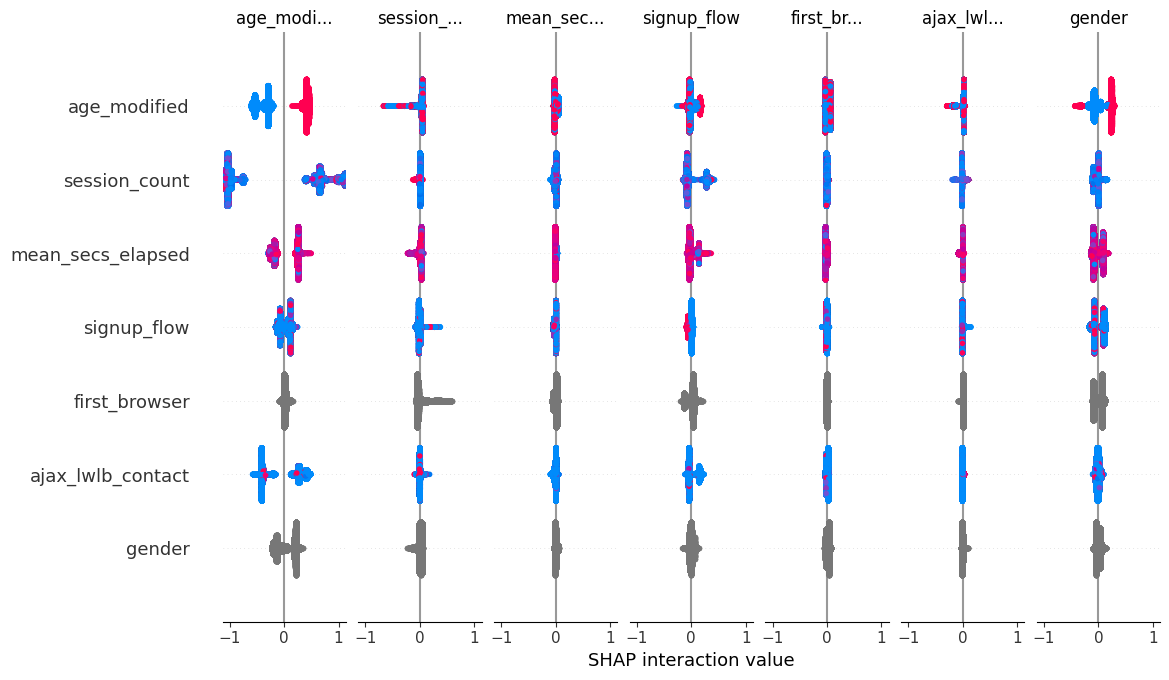

In [38]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", class_names= class_names, feature_names = X_train.columns)